In [1]:
# matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)
Base.classes.keys()


['measurement', 'station']

In [6]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [8]:
# View all of the classes that automap found
first_row = session.query(Station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fb741684c10>,
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0,
 'longitude': -157.8168,
 'station': 'USC00519397',
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
# engine.execute('SELECT date FROM measurement'). Order_by dsc.
mostrecent = session.query(func.max(Measurement.date)).first()
mostrecent

('2017-08-23',)

Text(0, 0.5, 'Inches')

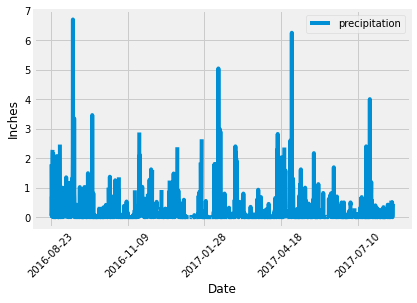

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev= dt.date(2017, 8, 23) - dt.timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
rainfall = session.query(Measurement.date, Measurement.prcp). filter(Measurement.date >= prev). all()

# Save the query results as a Pandas DataFrame and set the index to the date column
rain= pd.DataFrame(rainfall, columns=['date', 'precipitation'])

# Sort the dataframe by date
rain = rain.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
rain.plot(x='date', y='precipitation', rot=45)
plt.xlabel ("Date")
plt.ylabel ("Inches")



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
rain.describe()


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
stationcount =session.query(Station.id).all()
stationcount

[(1,), (2,), (3,), (4,), (5,), (6,), (7,), (8,), (9,)]

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

results =session.query(\
        func.count(Measurement.station),\
        Measurement.station).\
        group_by(Measurement.station).\
        order_by(func.count(Measurement.station).desc()).all()
results 

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [14]:
# session.query(Dow.date).\
#     filter(Dow.date > '2011-03-01').\
#     order_by(Dow.date).all()
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
bigrain=session.query(\
        func.min(Measurement.tobs),\
        func.max(Measurement.tobs),\
        func.avg(Measurement.tobs)).\
        filter(Measurement.station == 'USC00519281').all()
bigrain


[(54.0, 85.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

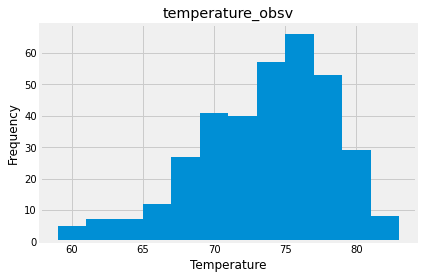

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev= dt.date(2017, 8, 23) - dt.timedelta(days=365)
bigheat= session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.date >= prev). \
    filter(Measurement.station == 'USC00519281').all()
heat= pd.DataFrame(bigheat, columns=['date', 'temperature_obsv'])
heat.hist(column='temperature_obsv', bins=12)
plt.xlabel ("Temperature")
plt.ylabel ("Frequency")

# Close session

In [16]:
# Close Session
session.close()